In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim

<IPython.core.display.Javascript object>


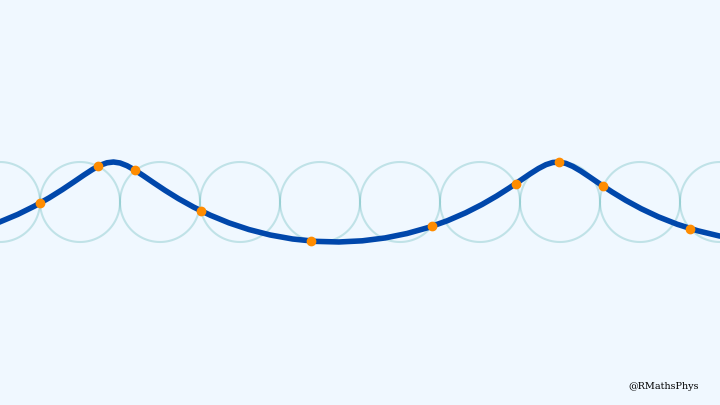

In [2]:
xmax = 18 # maximum x-axis value to display (xmin = 0)
ymax = 2.5 # maximum x-axis value to display (ymin = -ymax)
colour = '#f0f8ff'

r = 1 # radius of the generating circle
k = 60 # resolution of the surface
turbulence = 0.90 # how calm/rough the waves are (0: no waves)
frames = 220 # this controls the speed of the waves

tstep = (2*np.pi)/frames # Automatic Enables looping, In radians
phi = np.linspace(0, 2*np.pi, 100)
x0 = np.linspace(0-2*r, xmax+2*r, k)
circles = np.arange(0, xmax+(2*r), 2*r)

t = lambda x, n: (n*tstep + (0.2*np.pi*x*turbulence % (2*np.pi))) % (2*np.pi) # period: x=10
circle_x = lambda a, b: a + r*np.cos(b)
circle_y = lambda a, b: a + r*np.sin(b)

fig, ax = plt.subplots(figsize=(7.2, 4.06), facecolor=colour)
fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=None, hspace=None)
ax.set(aspect=True, xlim=(0,xmax), ylim=(-ymax,ymax))
ax.axis(False)

ax.text(x=0.97, y=-0.4, transform=ax.transAxes, s='@RMathsPhys',
        ha='right', va='top', fontsize=7, color='black', fontfamily='Serif')

surf_x = [circle_x(i, t(i, 0)) for i in x0]
surf_y = [circle_y(0, t(i, 0)) for i in x0]
dots_x = [circle_x(i, t(i, 0)) for i in circles]
dots_y = [circle_y(0, t(i, 0)) for i in circles]

for i in circles:
    ax.plot(circle_x(i, phi), circle_y(0, phi), c='#008b8b', alpha=0.2)
    
dots = ax.scatter(dots_x, dots_y, c='#ff8c00', zorder=9)
surface, = ax.plot(surf_x, surf_y, c='#0047ab', lw=4)
def evolver(n):    
    surf_x = [circle_x(i, t(i, n)) for i in x0]
    surf_y = [circle_y(0, t(i, n)) for i in x0]
    dots_x = [circle_x(i, t(i, n)) for i in circles]
    dots_y = [circle_y(0, t(i, n)) for i in circles]
    
    dots.set_offsets(np.column_stack([dots_x, dots_y]))
    surface.set_data(np.array([surf_x, surf_y]))    
    return dots, surface

ani = anim.FuncAnimation(fig, evolver, frames=frames, interval=10, repeat=False)
metadata = {'title':'Trochoidal Waves', 'author':'RMathsPhys'}
writer = anim.FFMpegWriter(metadata=metadata, fps=100)
# ani.save('trochoidalwaves.mp4', dpi=320, writer=writer, savefig_kwargs={'facecolor':colour})

plt.show()